# MNIST Digits

In [161]:
from sklearn.datasets import load_digits

In [162]:
digits, target = load_digits(return_X_y=True)
digits_square = digits.reshape(-1, 8, 8)

In [163]:
import matplotlib.pyplot as plt

In [164]:
import random
import numpy as np

[[ 0.  0.  0.  2. 13.  9.  0.  0.]
 [ 0.  0.  0.  7. 16. 15.  0.  0.]
 [ 0.  0.  0. 11. 16.  7.  0.  0.]
 [ 0.  0.  0. 15. 16.  2.  0.  0.]
 [ 0.  0.  7. 16. 14.  0.  0.  0.]
 [ 0.  0. 13. 16. 14.  0.  0.  0.]
 [ 0.  0.  8. 15. 16.  0.  0.  0.]
 [ 0.  0.  0.  3. 13.  8.  0.  0.]]
[1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1]


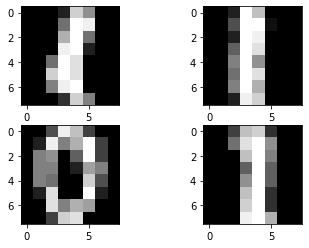

In [165]:
def generate_random_indices(percentage, class1, class2):
    indices_of_class1 = np.nonzero(target == class1)[0]
    indices_of_class2 = np.nonzero(target == class2)[0]

    min_length = min(len(indices_of_class1), len(indices_of_class2)) - 1

    indices_of_class = np.concatenate((indices_of_class1[:min_length], indices_of_class2[:min_length]))

    return random.sample(indices_of_class.tolist(),k=int(len(indices_of_class)*percentage))

def get_random_data(class1, class2):
    indices = generate_random_indices(0.3, class1, class2)
    return digits[indices,:], target[indices]

digits_sample, target_sample = get_random_data(0,1)
print(digits_sample.reshape((-1, 8, 8))[0])
print(target_sample)
plt.gray()
plt.subplot(2,2,1)
plt.imshow(digits_sample.reshape((-1, 8, 8))[0])
plt.subplot(2,2,2)
plt.imshow(digits_sample.reshape((-1, 8, 8))[1])
plt.subplot(2,2,3)
plt.imshow(digits_sample.reshape((-1, 8, 8))[2])
plt.subplot(2,2,4)
plt.imshow(digits_sample.reshape((-1, 8, 8))[3])

In [166]:
def train():
    indices = generate_random_indices(0.6, 0, 1)
    digits_sample, target_sample = digits[indices,:], target[indices]
    isum0 = np.ndarray((8,8))
    isum1 = np.ndarray((8,8))
    a = 0
    b = 0
    for x in range(len(target_sample)):
       if(target_sample[x] == 0): 
          isum0 += digits_sample.reshape((-1, 8, 8))[x] 
          a+=1   
       else:
          isum1 += digits_sample.reshape((-1, 8, 8))[x]
          b+=1

    return isum0/a, isum1/b
    


In [193]:
def predict(digs): #take digits and for each one return a multidimensional array containing the predicted labels
    a0, a1 = train()
    a0.max
    indices0 = np.nonzero(a0 < 3)
    indices1 = np.nonzero(a1 < 3)
    digs = digs.reshape((-1, 8, 8))
    
    a0[indices0] = 0
    a1[indices1] = 0


    response = np.zeros((len(digs)))
    
    for i in range(len(digs)):
        digs[np.nonzero(digs <3)] = 0
        dif0 = np.abs(a0 - digs[i])
        dif1 = np.abs(a1 - digs[i])
        y = dif0.sum()
        w = dif1.sum() 
        response[i] = 0 if y<w else 1

    plt.subplot(2,2,1)
    plt.imshow(digs[0])
    plt.subplot(2,2,2)
    plt.imshow(digs[1])  
    plt.subplot(2,2,3)
    plt.imshow(digs[2])
    plt.subplot(2,2,4)
    plt.imshow(digs[3]) 
        
    return response

In [194]:
def accuracy(predictions, target): 
    print(predictions)
    print(target)
    return np.count_nonzero(target_sample == predictions)/len(target)

[1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
[1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1]


0.5660377358490566

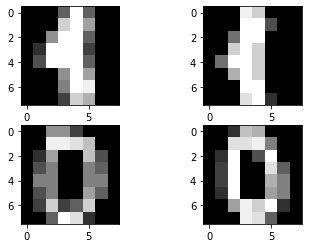

In [195]:
a = get_random_data(0,1)
accuracy(predict(a[0]), a[1])